In [0]:
import os
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
directory_name = "/content/drive/My Drive/airbnb"

with open(os.path.join(directory_name, 'listings.pkl'), 'br') as k:
    df_listings = pickle.load(k)

In [0]:
import numpy as np
num_data = df_listings.select_dtypes(include=np.number)
cat_data = df_listings.select_dtypes(exclude=np.number)
cat_data.insert(0,'id',df_listings['id'])

In [0]:
import pandas as pd
pd.options.display.max_columns = None

In [0]:
text_columns = ['name','summary','space','description','neighborhood_overview','transit','access',
                'interaction','house_rules','host_location','host_about','host_verifications','street',
                'neighbourhood','neighbourhood_cleansed','amenities','jurisdiction_names']
text_data = cat_data[text_columns]
# text_data.head()

In [0]:
import re
import string
# ['amenities','neighborhood_cleansed','street','street','host_verifications'] ---- 18684
def clean_1(text):
  text = text.lower()
  text = re.sub(r'[{}]','',text)
  return text
cleanAmenities_1 = lambda x: clean_1(x)

In [0]:
amenities = text_data.amenities.apply(cleanAmenities_1)
text_data['amenities'] = amenities

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In the next two functions two regular expressions (`regEx`) operations will be performed. Each row of the `amenities` column contains a long string of amenities separated either by comma or double quotation. In the following two functions make use of these characterstics inorder to split each amenities. However there is one exception where a single amenity inside a double quotation and contain a comma inside the quotation. So the following two reqular expressions method will be used.


1.   In the first function we will subsitute commas inside double quotation by '&'
2.   List of amenities will be produced from a long string of amenites 



In [0]:
def commaSubsitution(text):
  
  # find the pattern of text of like "wide clearance to shower, toilet"
  pattern = re.compile(r'("[\w\s]+),([\w\s]+")')
  sub_text = pattern.sub(r'\1 &\2',text)

  return sub_text

In [0]:
def find_amenities(text):

  text = commaSubsitution(text)
  # The pattern should be either inside quotes or separated with comma
  pattern = re.compile(r'[^",]+')
  matches = re.findall(pattern, text)

  return matches

findAmenities = lambda x: find_amenities(x)

In [0]:
amenitiesList = text_data.amenities.apply(findAmenities)

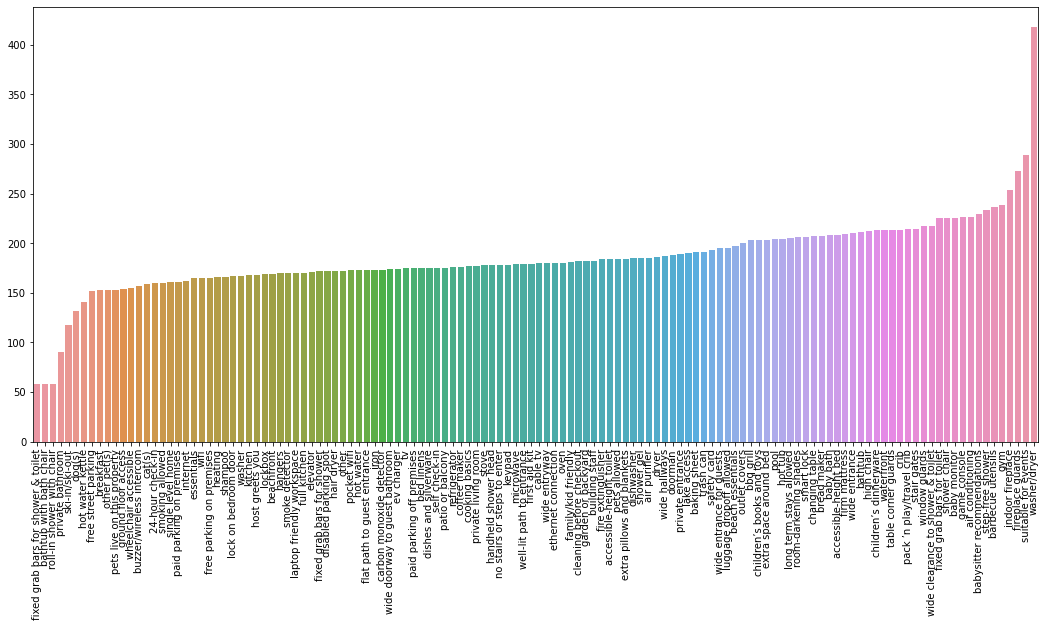

In [0]:
y = df_listings[['price']]
from collections import defaultdict, Counter
amenitiesDict = defaultdict(int)
priceDict = defaultdict(float)
AvgPrice = defaultdict(float)

for amenity,price in zip(amenitiesList,df_listings.price):
  for item in amenity:
    if 'translation missing' not in item:
      amenitiesDict[item]+=1
      priceDict[item]+=price
for amenity in priceDict:
  AvgPrice[amenity] = priceDict[amenity]/amenitiesDict[amenity]

# sorting dictionary items by their values
AvgPrice = {amenity: price for amenity, price in sorted(AvgPrice.items(), key=lambda item: item[1])}

# # Bar plot for amenieies versus price
plt.figure(figsize=(18,8))
sns.barplot(x = list(AvgPrice.keys()), y = list(AvgPrice.values()))
plt.xticks(rotation = 90)
plt.show()
